# Uniform longitudinal beam loading

In [1]:
%matplotlib notebook 

In [2]:
import sys
sys.path.append('/Users/chall/research/github/rswarp/rswarp/utilities/')
import beam_analysis
import file_utils
from mpl_toolkits.mplot3d import Axes3D
import pickle

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [4]:
def svecplot(array):
    fig = plt.figure(figsize = (8,8))
    Q = plt.quiver(array[:,0],array[:,2],array[:,1],array[:,3])
    plt.quiverkey(Q,0.0, 0.92, 0.002, r'$2', labelpos='W')
    xmax = np.max(array[:,0])
    xmin = np.min(array[:,0])
    plt.xlim(1.5*xmin,1.5*xmax)
    plt.ylim(1.5*xmin,1.5*xmax)
    plt.show()

In [5]:
# Load simulation parameters
simulation_parameters = pickle.load(open("simulation_parameters.p", "rb"))
print simulation_parameters['timestep']

6.66666666667e-13


## Load and View Initial Distribution

In [6]:
f0 = file_utils.readparticles('diags/xySlice/hdf5/data00000001.h5')

In [7]:
step0 = beam_analysis.convertunits(f0['Electron'])

<IPython.core.display.Javascript object>


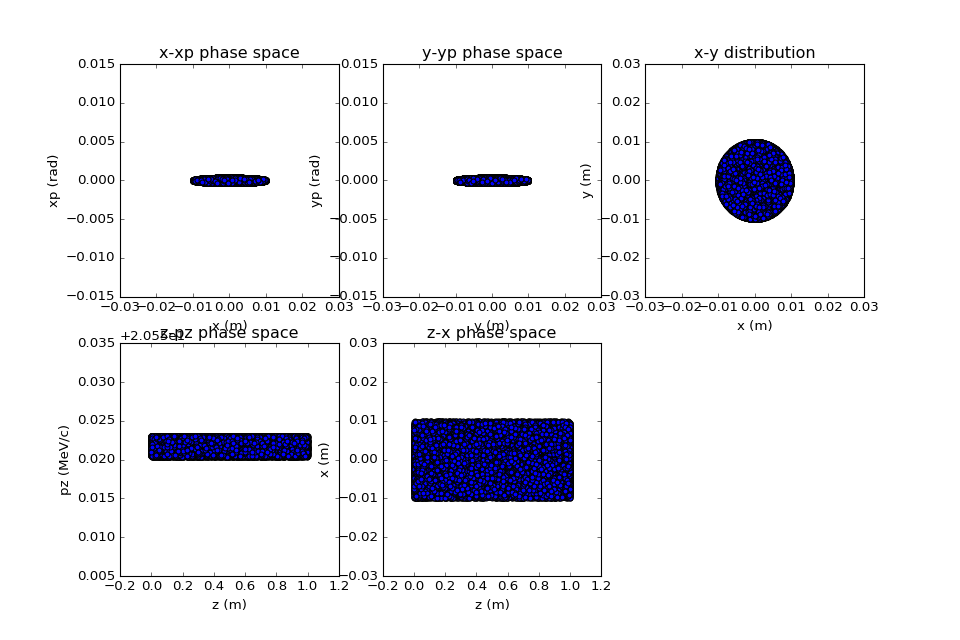

In [8]:
beam_analysis.plotphasespace(step0); # semicolon suppresses second plot

<IPython.core.display.Javascript object>


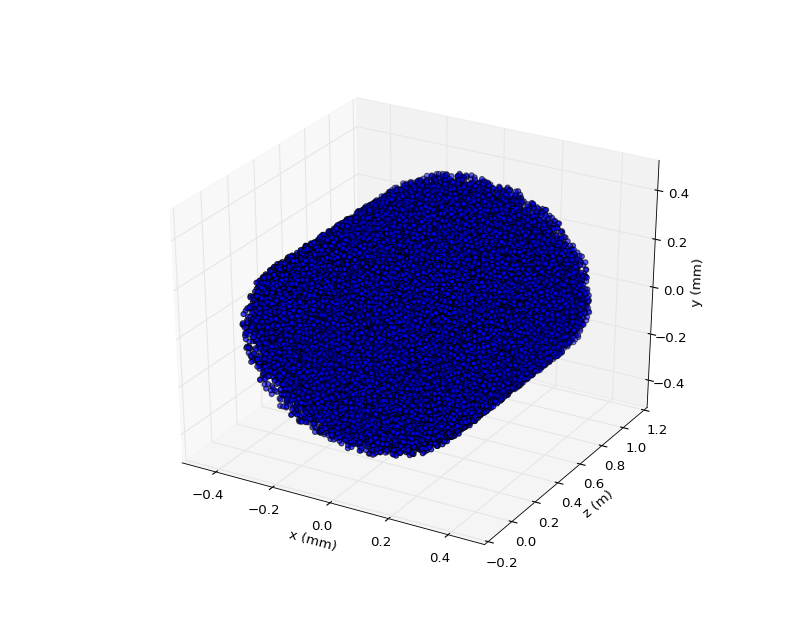

In [9]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(step0[:,1]*1e3,step0[:,4],step0[:,3]*1e3)

ax.set_xlabel('x (mm)')
ax.set_ylabel('z (m)')
ax.set_zlabel('y (mm)')


plt.show()

## Load All Steps

In [10]:
full =  file_utils.loadparticlefiles('diags/xySlice/hdf5/')

allSteps = []

for step in range(100,1400,100):
    scon = beam_analysis.convertunits(full[step]['Electron'])
    allSteps.append(full[step]['Electron'])
allSteps = np.array(allSteps)


In [1]:
# beam_analysis.plotphasespace(allSteps[10,:,:]):

# Magnetostatic Only Check

<IPython.core.display.Javascript object>


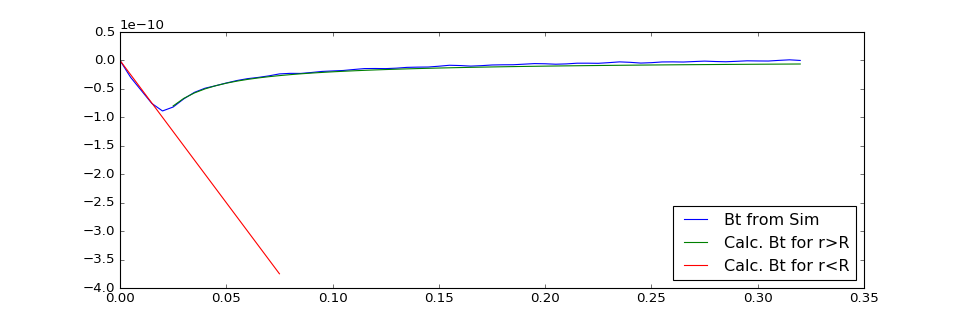

In [12]:
f0 = h5.File('diags/fields/magnetic/bfield00200.h5', 'r')

Bx = f0['data/200/meshes/B/r']
By = f0['data/200/meshes/B/t']
Bz = f0['data/200/meshes/B/z']

fig = plt.figure(figsize=(12,4))
ax = plt.gca()

xpoints = np.linspace(0,0.32,Bx[0,:,8].shape[0])
ax.plot(xpoints,By[0,:,15],label = "Bt from Sim")
ax.plot(xpoints[5:], -2 * 10.0e-6 * 1e-7 / (xpoints[5:]), label="Calc. Bt for r>R")
ax.plot(xpoints[0:16], -2 * 10e-6 * 1e-7 * (xpoints[0:16]) / 0.02**2, label="Calc. Bt for r<R")
ax.legend(loc=4)


plt.show()


<IPython.core.display.Javascript object>


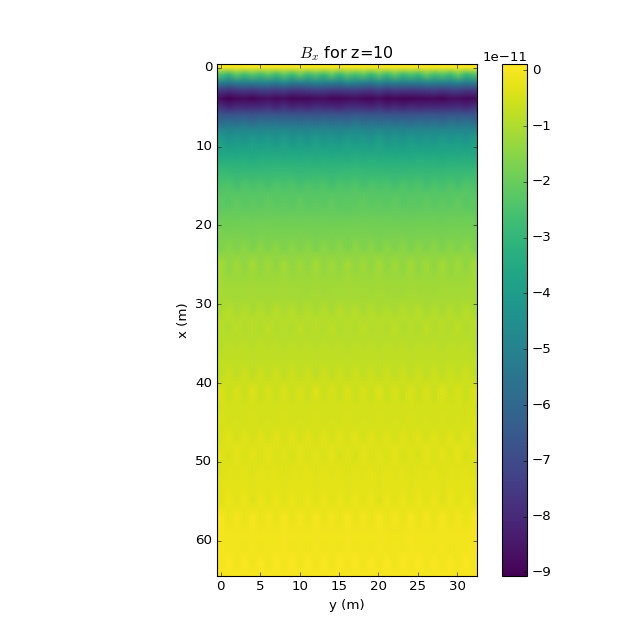

In [13]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
zslice = 10
ax.set_xlabel("y (m)")
ax.set_ylabel("x (m)")
ax.set_title("$B_%s$ for z=%s" % ('x',zslice))
cax = ax.imshow(By[0,:,:],cmap=plt.cm.viridis)
fig.colorbar(cax)
plt.tight_layout
plt.show()

# Electrostatic Only Check

In [48]:
# Calculate charge
I = 10e-6
L = 1.0
e = 1.6e-19
c = 3e8
beta = 0.56823

Ntot = int(I * L / e / (c * beta))
Qtot = Ntot * e

<IPython.core.display.Javascript object>


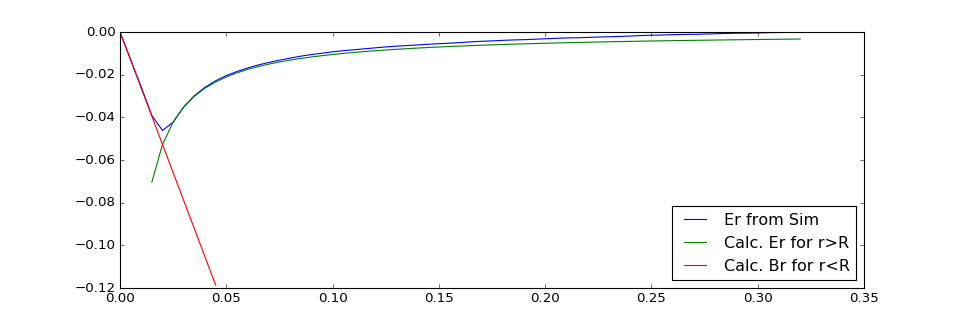

In [51]:
f0 = h5.File('diags/fields/electric/efield00200.h5', 'r')

Bx = f0['data/200/meshes/E/r']
By = f0['data/200/meshes/E/t']
Bz = f0['data/200/meshes/E/z']

fig = plt.figure(figsize=(12,4))
ax = plt.gca()

xpoints = np.linspace(0,0.32,Bx[0,:,8].shape[0])
ax.plot(xpoints,Bx[0,:,15],label = "Er from Sim")
ax.plot(xpoints[3:],  -1 * Qtot / (2 * np.pi * 8.854e-12 * xpoints[3:]), label="Calc. Er for r>R")
ax.plot(xpoints[0:10], -1 * Qtot * (xpoints[0:10]) / (2 * np.pi * 8.854e-12 * 0.02**2), label="Calc. Er for r<R")
ax.legend(loc=4)


plt.show()

# E and B Static Solvers

In [56]:
f0 = h5.File('diags/fields/electric/efield00200.h5', 'r')

Ex = f0['data/200/meshes/E/r']
Ey = f0['data/200/meshes/E/t']
Ez = f0['data/200/meshes/E/z']

f0 = h5.File('diags/fields/magnetic/bfield00200.h5', 'r')

Bx = f0['data/200/meshes/B/r']
By = f0['data/200/meshes/B/t']
Bz = f0['data/200/meshes/B/z']

<IPython.core.display.Javascript object>


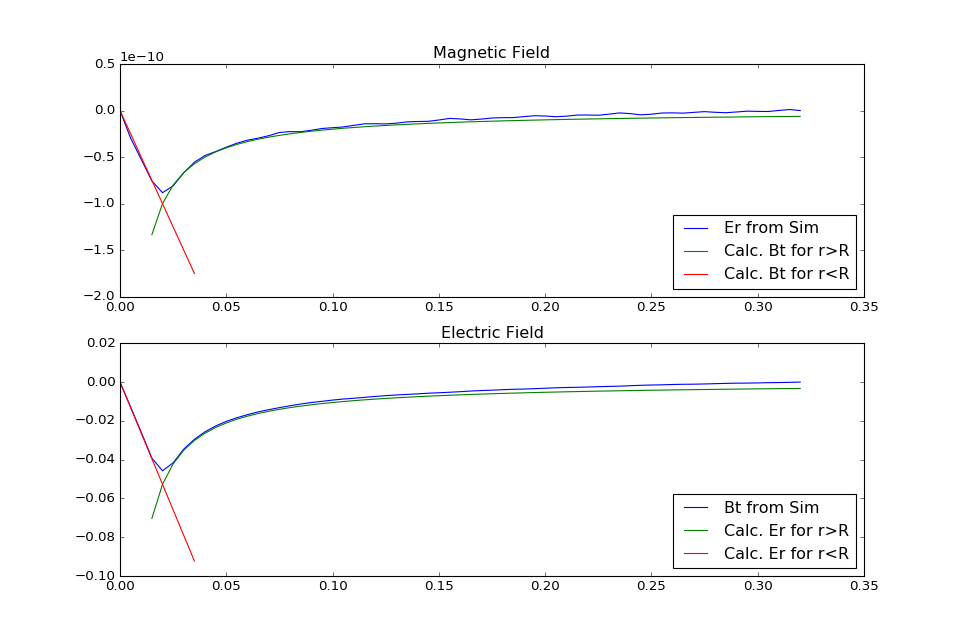

In [69]:
fig = plt.figure(figsize=(12,8))

xpoints = np.linspace(0,0.32,Bx[0,:,8].shape[0])

plt.subplot(211)
plt.plot(xpoints,By[0,:,15],label = "Er from Sim")
plt.plot(xpoints[3:], -2 * 10.0e-6 * 1e-7 / (xpoints[3:]), label="Calc. Bt for r>R")
plt.plot(xpoints[0:8], -2 * 10e-6 * 1e-7 * (xpoints[0:8]) / 0.02**2, label="Calc. Bt for r<R")
plt.legend(loc=4)
plt.title("Magnetic Field")

plt.subplot(212)
xpoints = np.linspace(0,0.32,Bx[0,:,8].shape[0])
plt.plot(xpoints,Ex[0,:,15],label = "Bt from Sim")
plt.plot(xpoints[3:],  -1 * Qtot / (2 * np.pi * 8.854e-12 * xpoints[3:]), label="Calc. Er for r>R")
plt.plot(xpoints[0:8], -1 * Qtot * (xpoints[0:8]) / (2 * np.pi * 8.854e-12 * 0.02**2), label="Calc. Er for r<R")
plt.legend(loc=4)
plt.title("Electric Field")

plt.show()